In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
#from keras.models import Sequential
#from keras.layers import Conv2D
#from keras.layers import MaxPool2D
#from keras.layers  import Flatten
#from keras.layers import Dense
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [4]:
#Training Parameters

train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [5]:
training_data = train_datagen.flow_from_directory(
    'Covid19_Xray_Prediction/Training',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 400 images belonging to 2 classes.


In [6]:
validation_data = test_datagen.flow_from_directory(
    'Covid19_Xray_Prediction/Validation',
    target_size=(224, 224),
    batch_size= 35,
    class_mode= 'binary')

Found 20 images belonging to 2 classes.


In [7]:
training_data.class_indices

{'Negative': 0, 'Positive': 1}

In [8]:
validation_data.class_indices

{'Negative': 0, 'Positive': 1}

In [9]:
model.fit_generator(training_data,
                    steps_per_epoch= 8,
                    epochs= 5,
                    validation_data= validation_data,
                    validation_steps= 2)

Epoch 1/5
8/8 [==============================] - 93s 12s/step - loss: 0.9931 - accuracy: 0.5391 - val_loss: 0.6888 - val_accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 68s 9s/step - loss: 0.6427 - accuracy: 0.6458 - val_loss: 0.5622 - val_accuracy: 0.9500
Epoch 3/5
8/8 [==============================] - 64s 8s/step - loss: 0.4829 - accuracy: 0.7891 - val_loss: 0.3752 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 65s 8s/step - loss: 0.3790 - accuracy: 0.8458 - val_loss: 0.2418 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 66s 8s/step - loss: 0.3531 - accuracy: 0.8833 - val_loss: 0.1239 - val_accuracy: 1.0000


In [10]:
model.save("model_adv.h5")

In [11]:
model.evaluate_generator(training_data)

[0.16954058408737183, 0.8675000071525574]

In [13]:
model.evaluate_generator(validation_data)

[0.1238526850938797, 1.0]

In [14]:
model = load_model('model_adv.h5')

In [38]:
model_jason = model.to_json()
with open("model.jason","w") as jason_file:
    jason_file.write(model_jason)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
import os

In [17]:
training_data.class_indices

{'Negative': 0, 'Positive': 1}

In [18]:
y_actual = []
y_test = []

In [25]:
from keras.preprocessing.image import *

In [27]:
for i in os.listdir("Covid19_Xray_Prediction/Validation/Negative/"):
    img = image.load_img("Covid19_Xray_Prediction/Validation/Negative/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [30]:
for i in os.listdir("Covid19_Xray_Prediction/Validation/Positive/"):
    img = image.load_img("Covid19_Xray_Prediction/Validation/Positive/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [32]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
cm = confusion_matrix(y_actual, y_test)

In [36]:
import seaborn as sns

<AxesSubplot:>

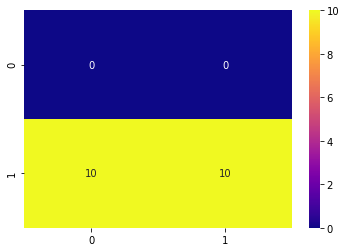

In [37]:
sns.heatmap(cm, cmap="plasma", annot = True)